# Lab 5

In [51]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle as pk

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

### Overview:

In this lab we wil be searching for the standard model Higgs boson in proton-proton colliosons at √ s = 13 TeV with simulated data from the Large Hadron Collider (LHC). 

Higgs bosons are produced with large transverse momentum (pT) and decay to a bottom quark-atiquart pair. Higgs canidates could be reconstructed as large-radius jets using Calorimeters. Because of a large QCD background signal that contaminates the data, 5-sigma observation of the Higgs has not been accomplished yet.

The goal is to use our set of training datasets to optimize event selections in order to enhance sensitivity. The optimal event selections will be applied to a selected psudo-experimental data. 

## Lab 5a: Loading  data

I am working with LHD data set 2. 

Signal dataset is higgs, background dataset is qcd.Each file contains  100k jets.

Each dataset (Higgs and QCD) have 14 features: 
‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32',  'KtDeltaR'

Each row is a jet. Each column is a property of the jet.

In [52]:
#Load Higgs Data & Define Variables
pickle_higgs = open('higgs_100000_pt_1000_1200.pkl', 'rb')
higgs = pk.load(pickle_higgs)

#Define 
hMass = higgs['mass']
hPt = higgs['pt']
hEta = higgs['eta']
hPhi = higgs['phi']
hEe2 = higgs['ee2']
hEe3 = higgs['ee3']
hD2 = higgs['d2']
hAngularity = higgs['angularity']
hT1 = higgs['t1']
hT2 = higgs['t2']
hT3 = higgs['t3']
hT21 = higgs['t21']
hT32 = higgs['t32']
hKtDeltaR = higgs['KtDeltaR']

# print('Higgs Data:')
# higgs

In [53]:
#Load QCD Data & Define Variables
pickle_qcd = open('qcd_100000_pt_1000_1200.pkl', 'rb')
qcd = pk.load(pickle_qcd)

#Define data features
qMass = qcd['mass']
qPt = qcd['pt']
qEta = qcd['eta']
qPhi = qcd['phi']
qEe2 = qcd['ee2']
qEe3 = qcd['ee3']
qD2 = qcd['d2']
qAngularity = qcd['angularity']
qT1 = qcd['t1']
qT2 = qcd['t2']
qT3 = qcd['t3']
qT21 = qcd['t21']
qT32 = qcd['t32']
qKtDeltaR = qcd['KtDeltaR']

# print('qcd Data:')
# qcd

## Lab 5b: Exploring Data

### Understanding the Physics of the Large Hadron Collider

A synchronous particle is a particle syncrhonized with the RF frequency.  

A bunch is a clump of paricles around the sunchronous particle. LHC collides protons in bunches.

Each bunch travels at almost the speed of light. 

In particle physics, linear momentum is represented by: **p =( pT , η , φ)**

### Variables
Each dataset (Higgs and QCD) have 14 features: 
‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32',  'KtDeltaR'

> **pt - Transverse Momentum**

> **eta - Psudorapidity η**

> **phi - Azimuthal Angle φ**

> **mass - Transverse Invariant Mass**

> **Energy Corelation Functions (ECF)**
    - **ee2 -   2-point ECF**
    - **ee3 -   3-point ECF**
    - **d2 -   ratio of ee2 and ee3** 

> **Angularity**

> **(t1, t2, t3, t32) - N-subjettyness**


> **KtDeltaR - size parameter of cone/jet?**

Goal is after exploring data to answer questions:

#1. Do all features provide discrimination power between signal and background?

#2. Are there correlation among these features?)

We explore the data in probability distribution histograms and 2-d histogram plots below. Note I only plotted the graphs that show discrimination power or correltaion. 

### Transverse Momentum

The transverse component of momentum is the component perpendicular to the beam line of particle, caluclated from transversal energy. 

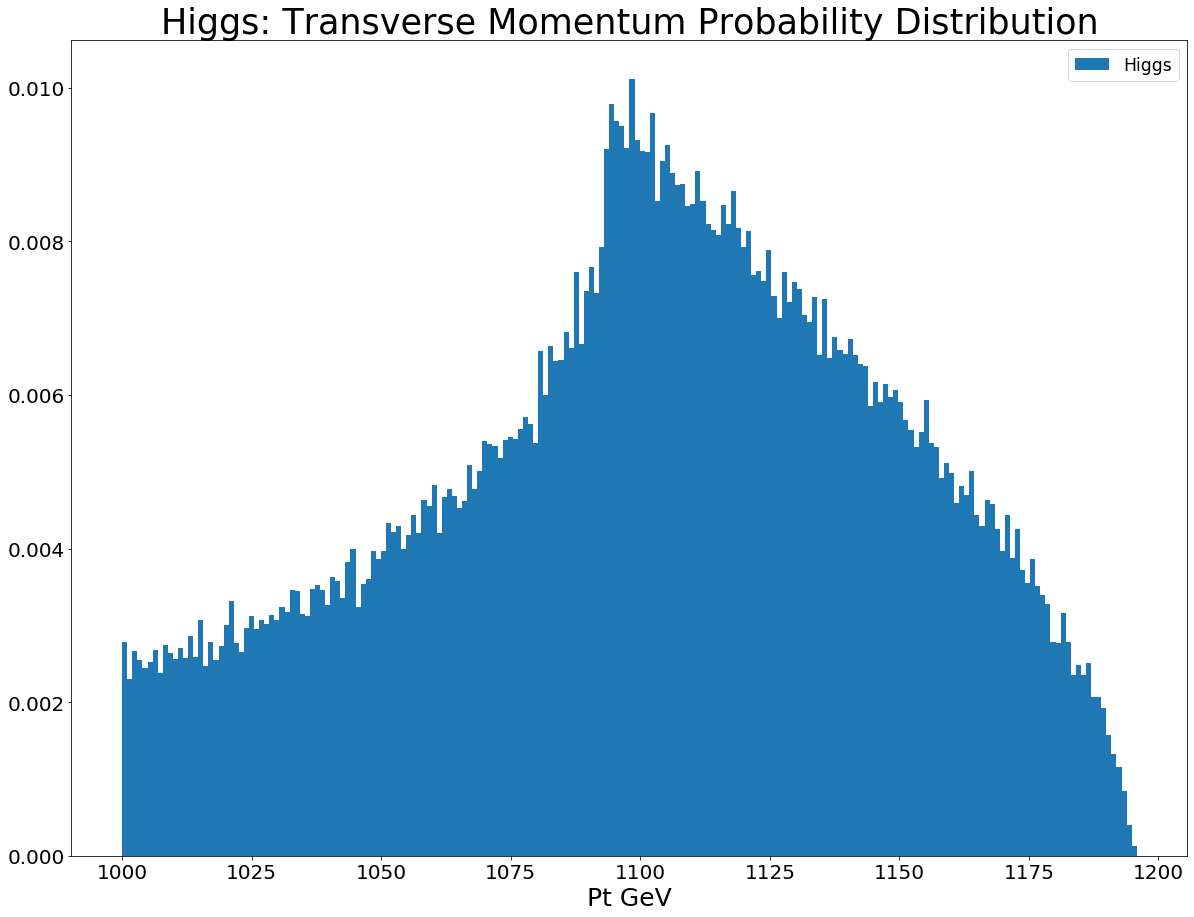

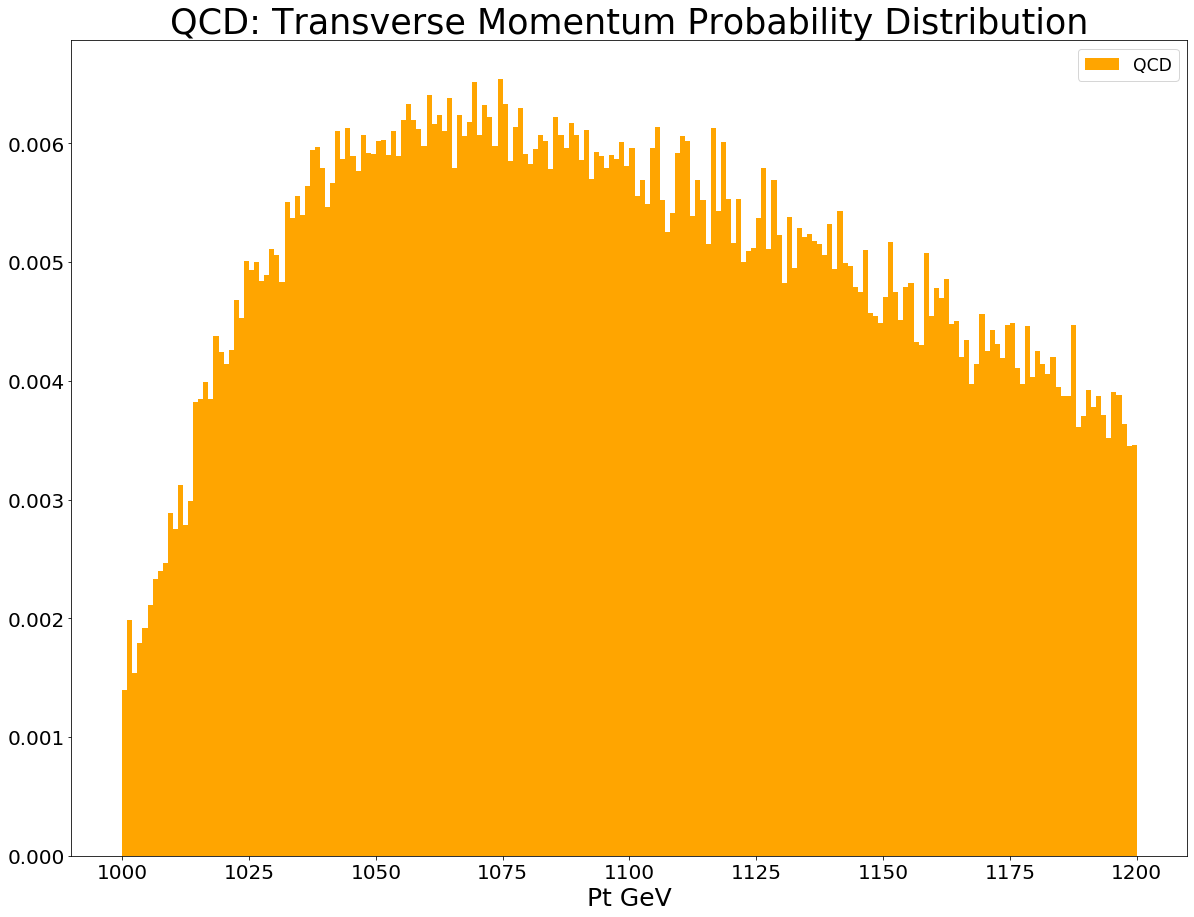

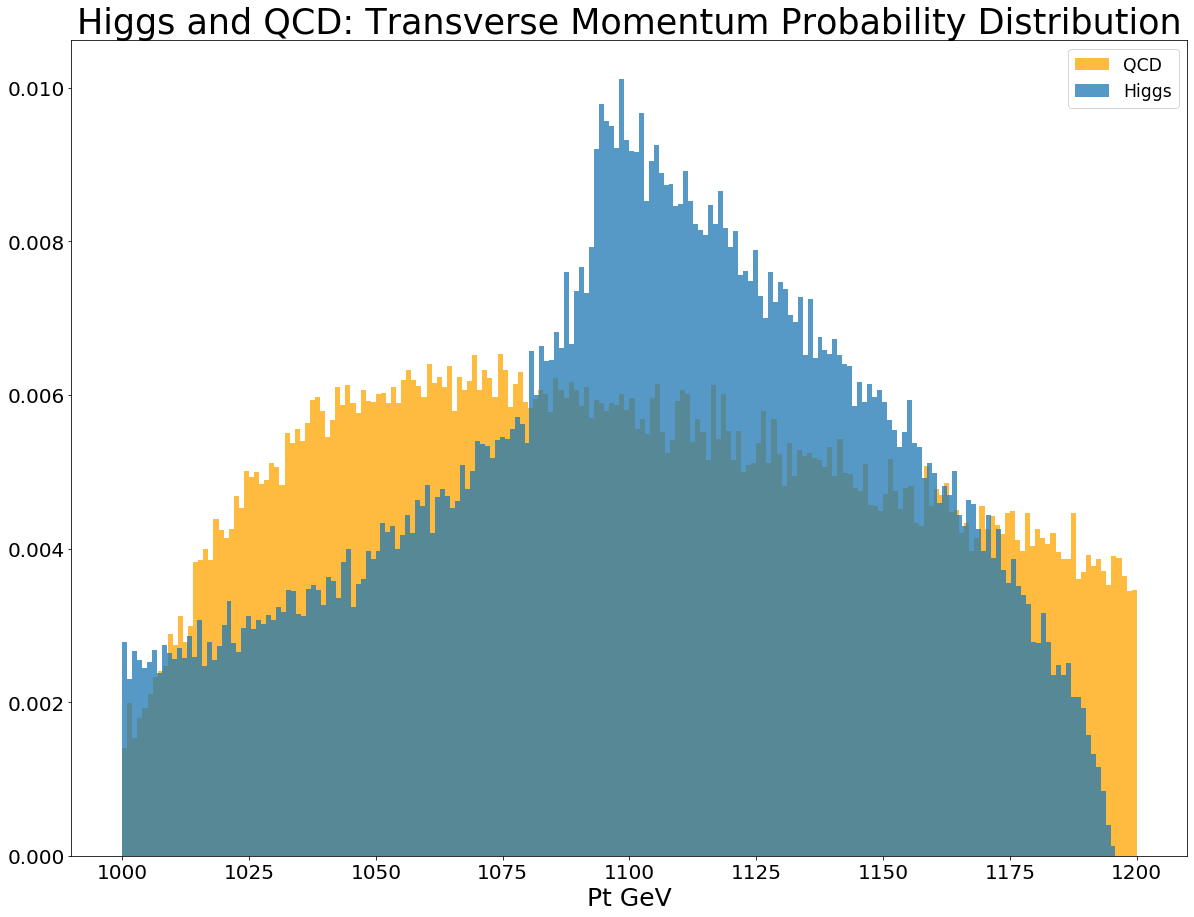

In [68]:
#---Momentum--- 

fig, ax = plt.subplots(1,1)
ax.hist(hPt, bins = 200, density=True, label='Higgs')
#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Pt GeV', size = 25)
ax.set_title('Higgs: Transverse Momentum Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()


fig, ax = plt.subplots(1,1)
ax.hist(qPt, bins = 200, density=True, color='orange', label='QCD')
#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Pt GeV', size = 25)
ax.set_title('QCD: Transverse Momentum Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

     
fig, ax = plt.subplots(1,1)
ax.hist(qPt, bins = 200, density=True, color='orange', alpha=0.75, label='QCD')
ax.hist(hPt, bins = 200, density=True, alpha=0.75, label='Higgs')

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Pt GeV', size = 25)
ax.set_title('Higgs and QCD: Transverse Momentum Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

In the plots above we can clearly see that the Higgs and QCD data sets follow different transverse momentum probability distributions. By setting a Pt window around the highest probability values we can find more Higgs particles than QCD background contamination. 

### Transverse Mass

${\displaystyle m_{T}^{2}=m^{2}+p_{x}^{2}+p_{y}^{2}=E^{2}-p_{z}^{2}\,}$

This is invariant under Lorentz boost along z direction. 

Transverse mass has units of GeV

When a particle decays, and no longer exists, its mass before the decay can ge calculated from the energies and momenta of the decay products.

We know that the mass of a Higgs particle is 125 GeV. 

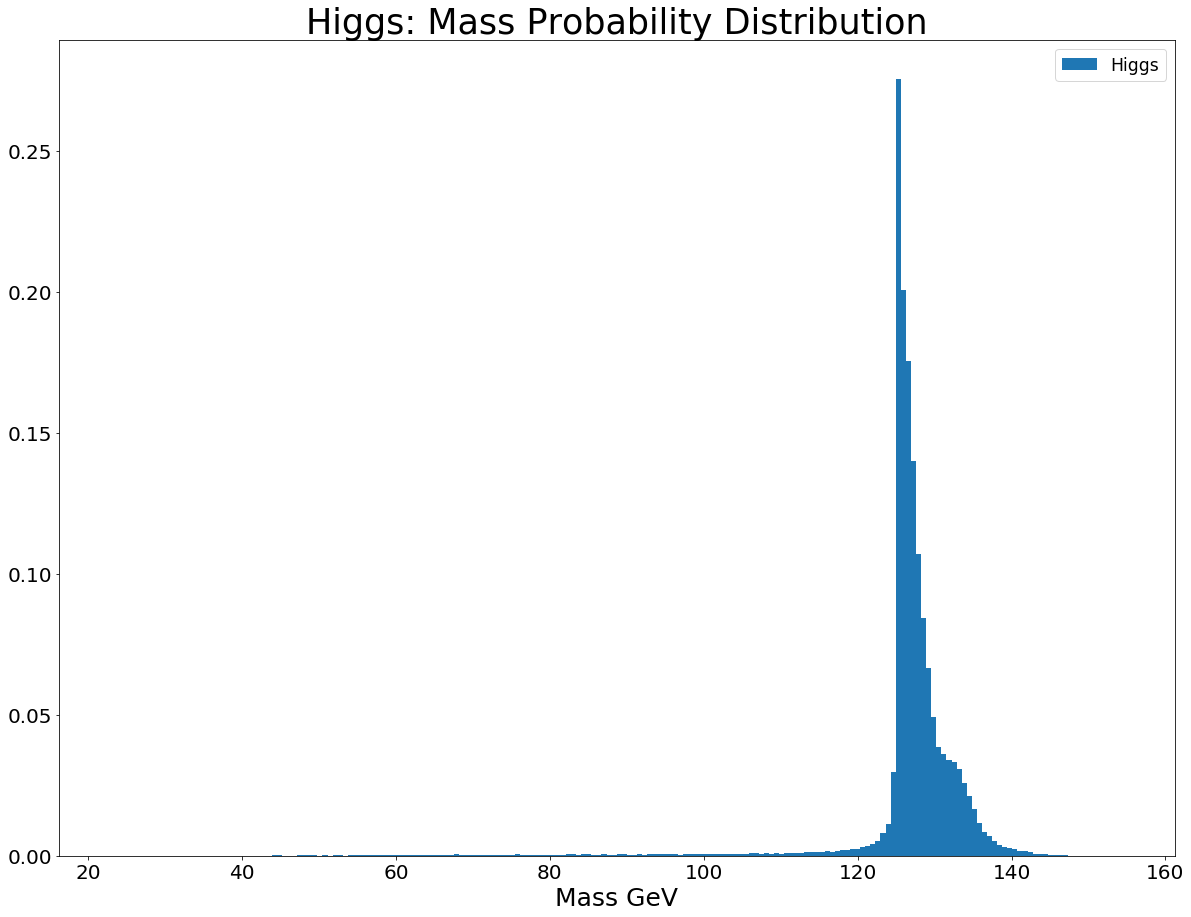

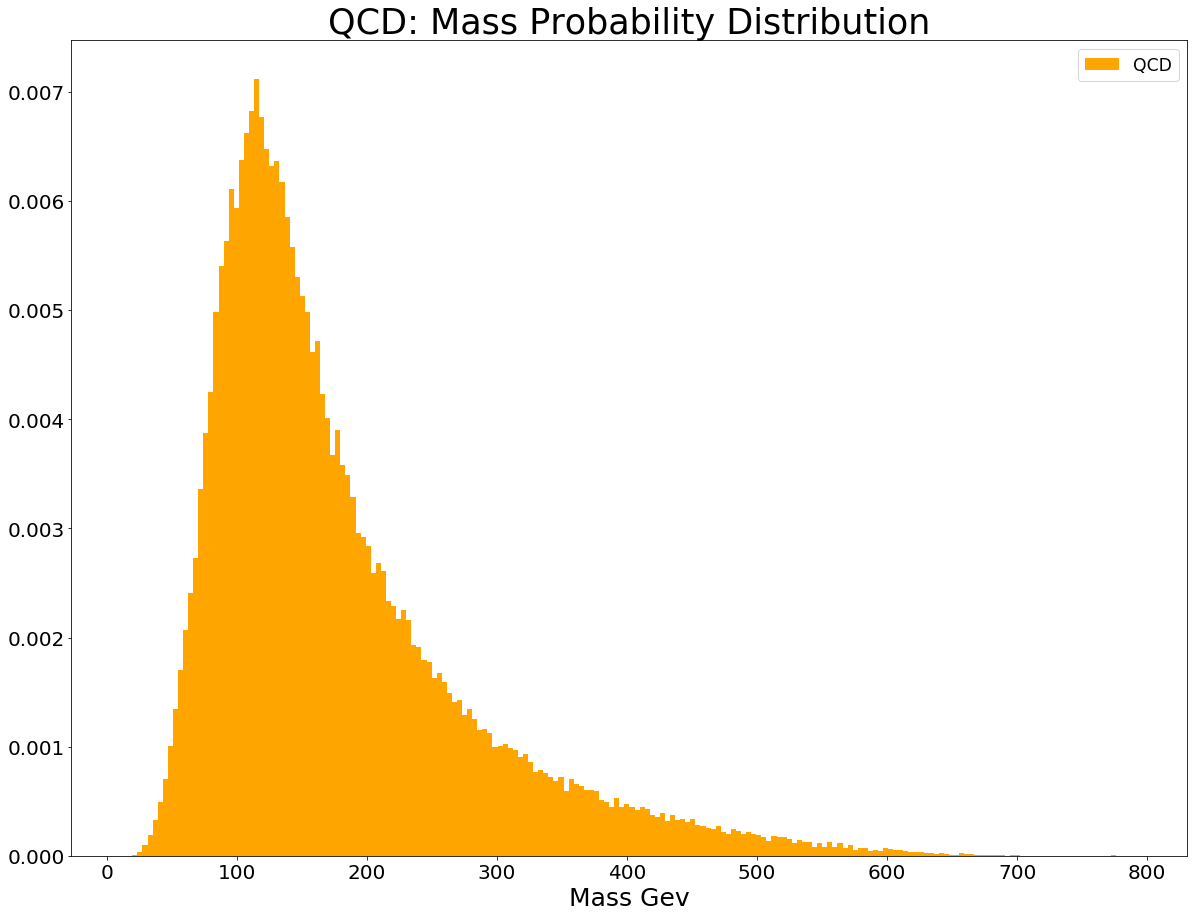

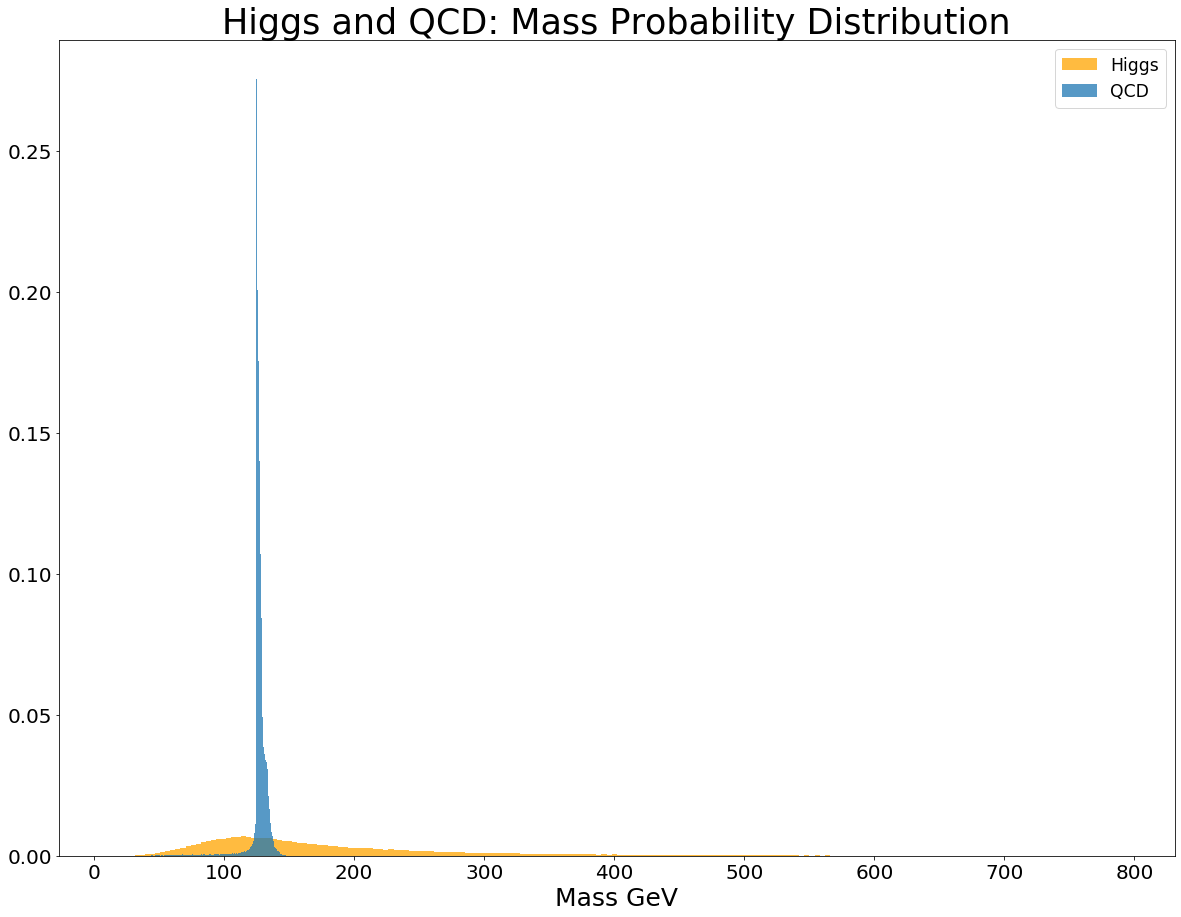

In [55]:
#---MASS--- 

fig, ax = plt.subplots(1,1)
ax.hist(hMass, bins = 200, density=True, label='Higgs')
#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass GeV', size = 25)
#ax.set_ylabel('phi', size = 25)
ax.set_title('Higgs: Mass Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()


fig, ax = plt.subplots(1,1)
ax.hist(qMass, bins = 200, density=True, color='orange', label='QCD')
#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass Gev', size = 25)
#ax.set_ylabel('phi', size = 25)
ax.set_title('QCD: Mass Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

     
fig, ax = plt.subplots(1,1)
ax.hist(qMass, bins = 200, density=True, color='orange', alpha=0.75, label='Higgs')
ax.hist(hMass, bins = 200, density=True, alpha=0.75, label='QCD')

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass GeV', size = 25)
#ax.set_ylabel('phi', size = 25)
ax.set_title('Higgs and QCD: Mass Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

From the QCD mass graph we see that the probability of the QCD background data (in orange) is very spread out.

From the Higgs graph, we see the probability distribution is very narrow, centered at 125 GeV, indicating that the higgs has a definite mass of 125 GeV which aligns with it's expected value.

This is a very good distinguishing feature.

### Energy Correlation Functions (ECF)

N-point energy correlation functions are helpful in discriminating massive QCD jets from boosted, heavy objects. Measuring multiple energy correlation functions on a jet defines a multi-dimensional phase space populated by signal and background jets.

The energy distribution resulting from hard scatterings can be described by energy correlation functions in momentum space.

In QCD this describes jet cross sections in terms of enery flow observables (peaked around the states associated with hard scattering) that initiate the jets.

**2-point ECF $e_2$ (ee2)** 

The measured value of ee2 defines the transverse momentum, splitting angle, and therefore defines the structure of the jet.


**3-point ECF $e_3$ (ee3)**

The 2-point and 3-point energy correlation functions are powerful observables for identifying the hadronic decays of boosted Z bosons.

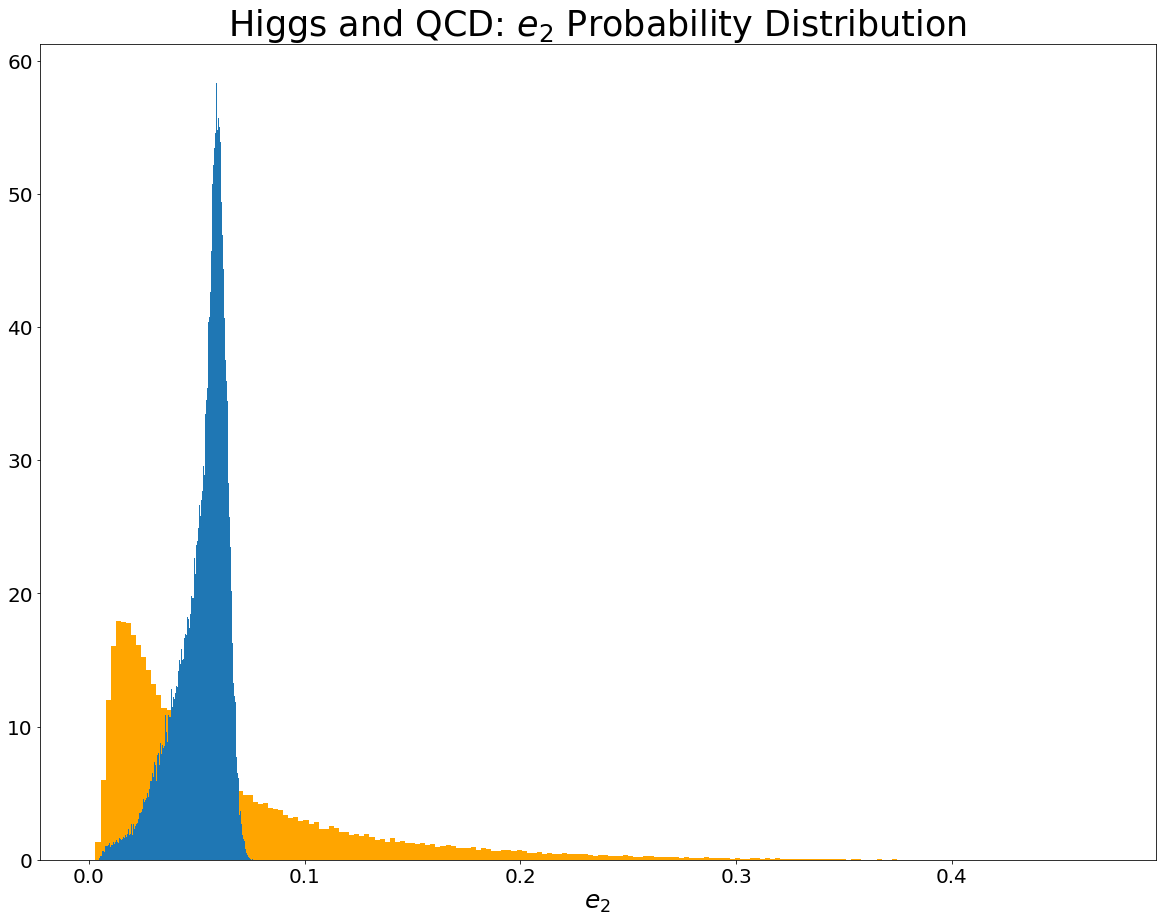

In [56]:
#---ee2--- 
fig, ax = plt.subplots(1,1)
ax.hist(qEe2, bins = 200, density=True, color='orange')
ax.hist(hEe2, bins = 200, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('$e_2$', size = 25)
ax.set_title('Higgs and QCD: $e_2$ Probability Distribution', size = 35)
plt.show()

Here we can see that ee2 has different distributions for the Higgs and QCD data sets, making it a very good variable to distinguish between the two.

### Subjettyness

N-subjettiness $\tau_n$ is an effective discriminating variable for tagging boosted objects and rejecting the background of QCD jets with large invariant mass.

$\tau_{nm} = \frac{\tau_n}{\tau_m}$
$ n>m$

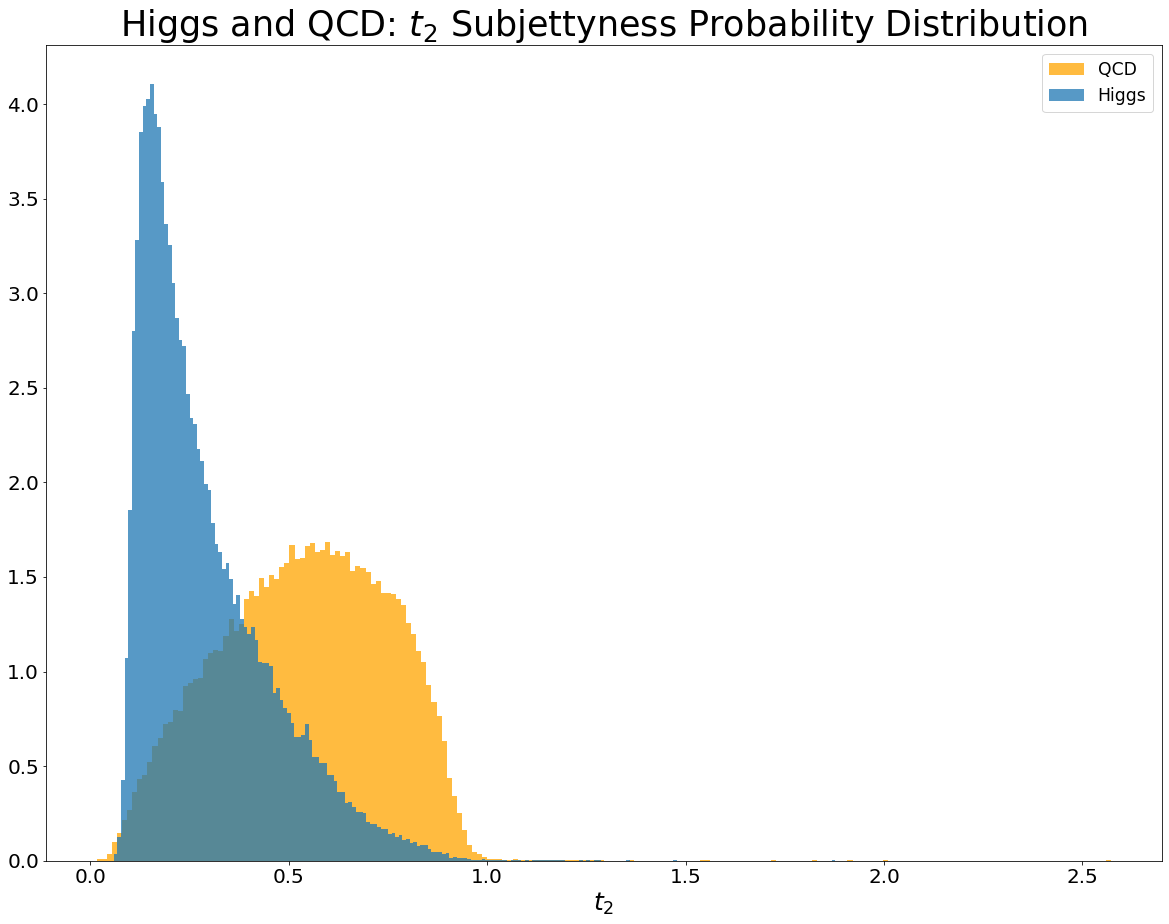

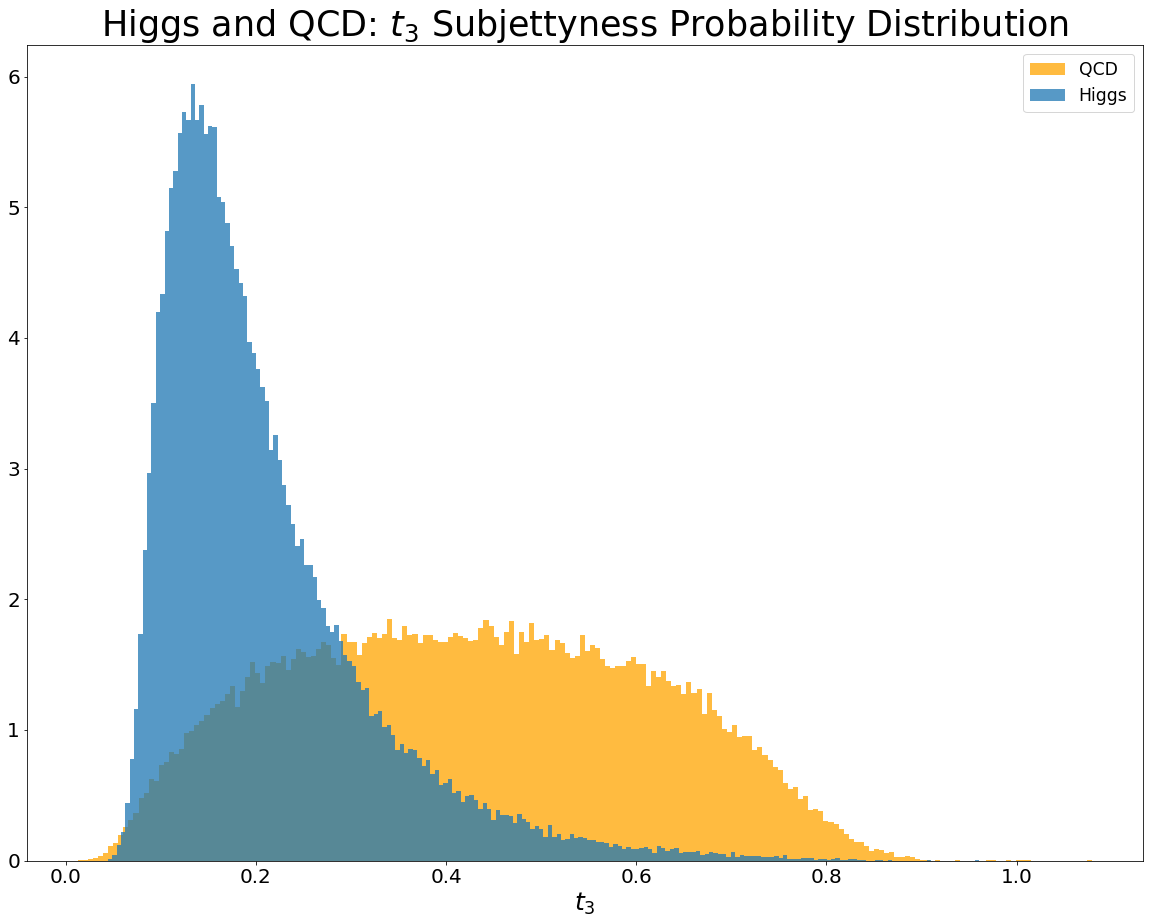

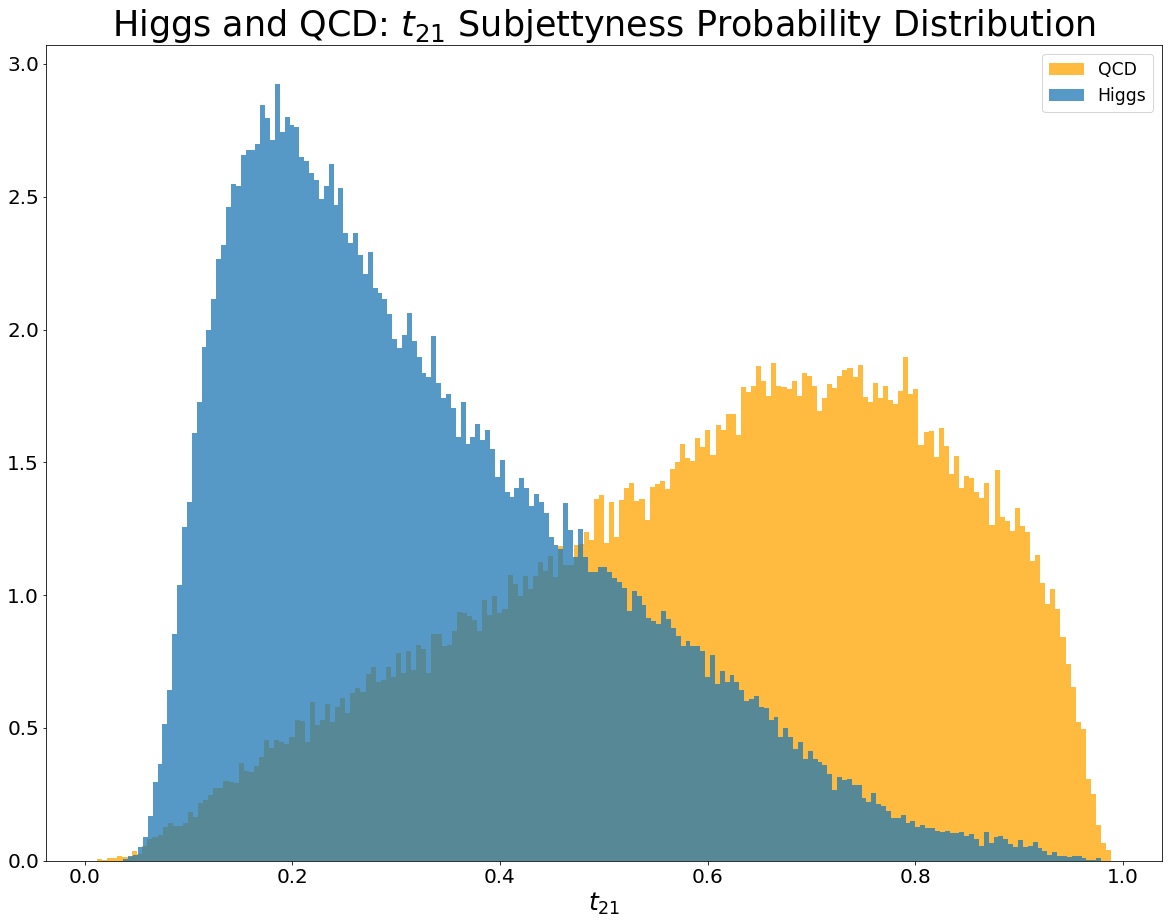

In [69]:
##Plot T2
fig, ax = plt.subplots(1,1)
ax.hist(qT2, bins = 200, density=True, color='orange', alpha=0.75, label='QCD')
ax.hist(hT2, bins = 200, density=True, alpha=0.75, label='Higgs')
#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('$t_2$', size = 25)
#ax.set_ylabel('phi', size = 25)
ax.set_title('Higgs and QCD: $t_2$ Subjettyness Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

##Plot T3
fig, ax = plt.subplots(1,1)
ax.hist(qT3, bins = 200, density=True, color='orange', alpha=0.75, label='QCD')
ax.hist(hT3, bins = 200, density=True, alpha=0.75, label='Higgs')
#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('$t_3$', size = 25)
#ax.set_ylabel('phi', size = 25)
ax.set_title('Higgs and QCD: $t_3$ Subjettyness Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()


##Plot T32
fig, ax = plt.subplots(1,1)
ax.hist(qT21, bins = 200, density=True, color='orange', alpha=0.75, label='QCD')
ax.hist(hT21, bins = 200, density=True, alpha=0.75, label='Higgs')
#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('$t_{21}$', size = 25)
#ax.set_ylabel('phi', size = 25)
ax.set_title('Higgs and QCD: $t_{21}$ Subjettyness Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

From the graphs above, we can see that these subjetty features are very good at distinguishing between Higgs and QCD data.

### KtDeltaR

KtDeltaR is the angular distance of two subjects within the large R jet. 
Angular distance is given in terms of $\Delta R$

$\Delta R =\sqrt((\Delta \eta)^2 + \Delta (\phi)^2)$

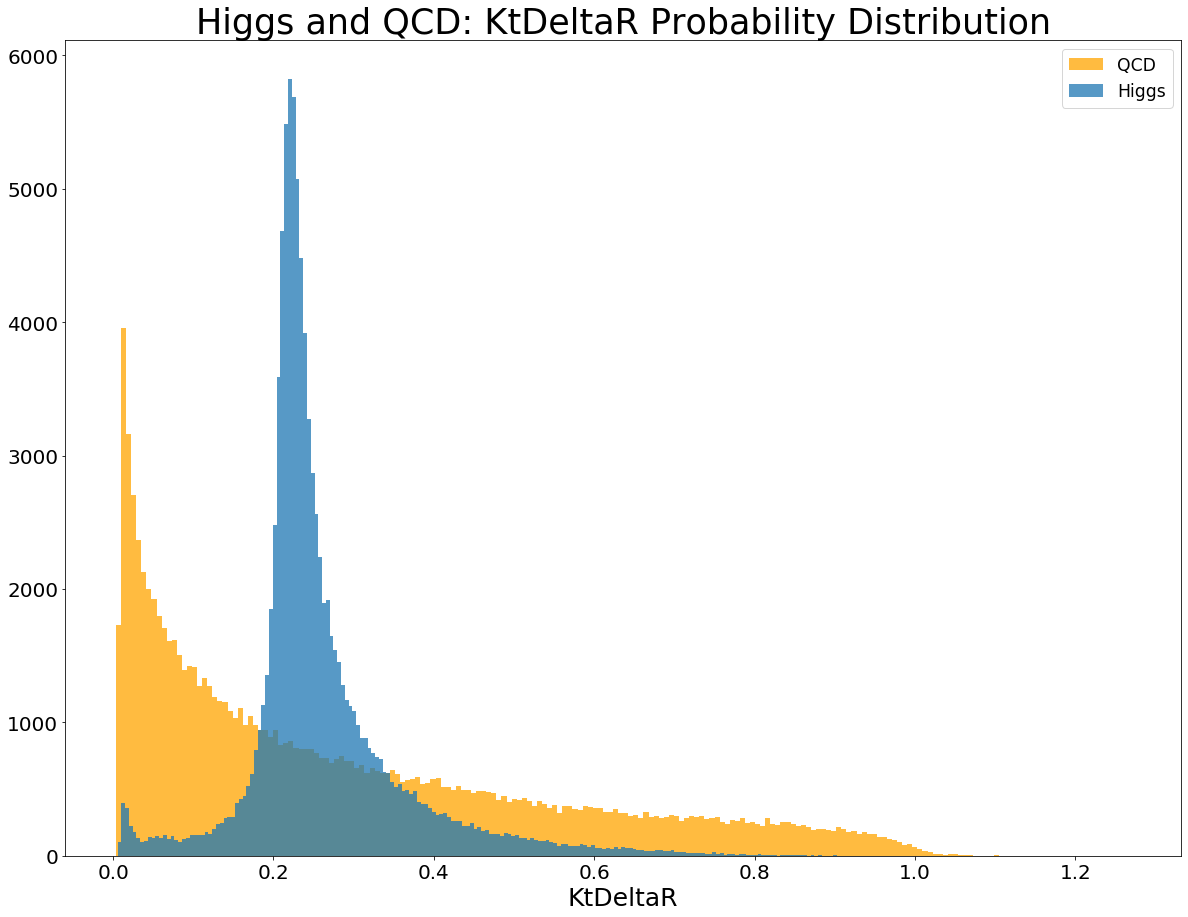

In [60]:
##Plot T32
fig, ax = plt.subplots(1,1)
ax.hist(qKtDeltaR, bins = 200, color='orange', alpha=0.75, label='QCD')
ax.hist(hKtDeltaR, bins = 200, alpha=0.75, label='Higgs')

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('KtDeltaR', size = 25)
ax.set_title('Higgs and QCD: KtDeltaR Probability Distribution', size = 35)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

This variable is very good at distinguishing between background contamination and Higgs signal, because the peaks are so different.

### Information on Variables Not Plotted
- These variables have little to no discrimination power


**Angularity:**

Angularity is an observable that is sensitive to the degree of symmetry in the energy flow inside a jet.

It is largeley un-correlated with all other variables.

**Psudorapidity η (eta):**

𝜂≡−ln[tan(𝜃/2)] , with values ranging (−∞, ∞).

θ = the angle between the particle three-momentum and the positive direction of the beam axis.

η is a spatial coordinate that describes the angle of a particle relative to the beam axis.

**Azimuthal Angle φ (phi):**

φ is the angle going around the beam.

Physics is symmetric in phi.


**And lastly $D_2$  is a ratio of the 2-point and 3-point Energy Correltation Functions:**

$D_2 = \frac{e_2}{{e_3}^3}$ 

## 1. Do all features provide discrimination power between signal and background?

No. 

As seen in the plots above, the features with the most discrimination power are:
- Mass
- Pt
- ee2
- t2
- t3
- t21
- KtDeltaR

###  Looking at correlations of Discriminating features with Mass

As seen in many of the research papers we looked at mass was used as a correlating variable on the x axis. They also applied a mass window, which only looks at a range of masses around the desired value of the mass of the Higgs particle.

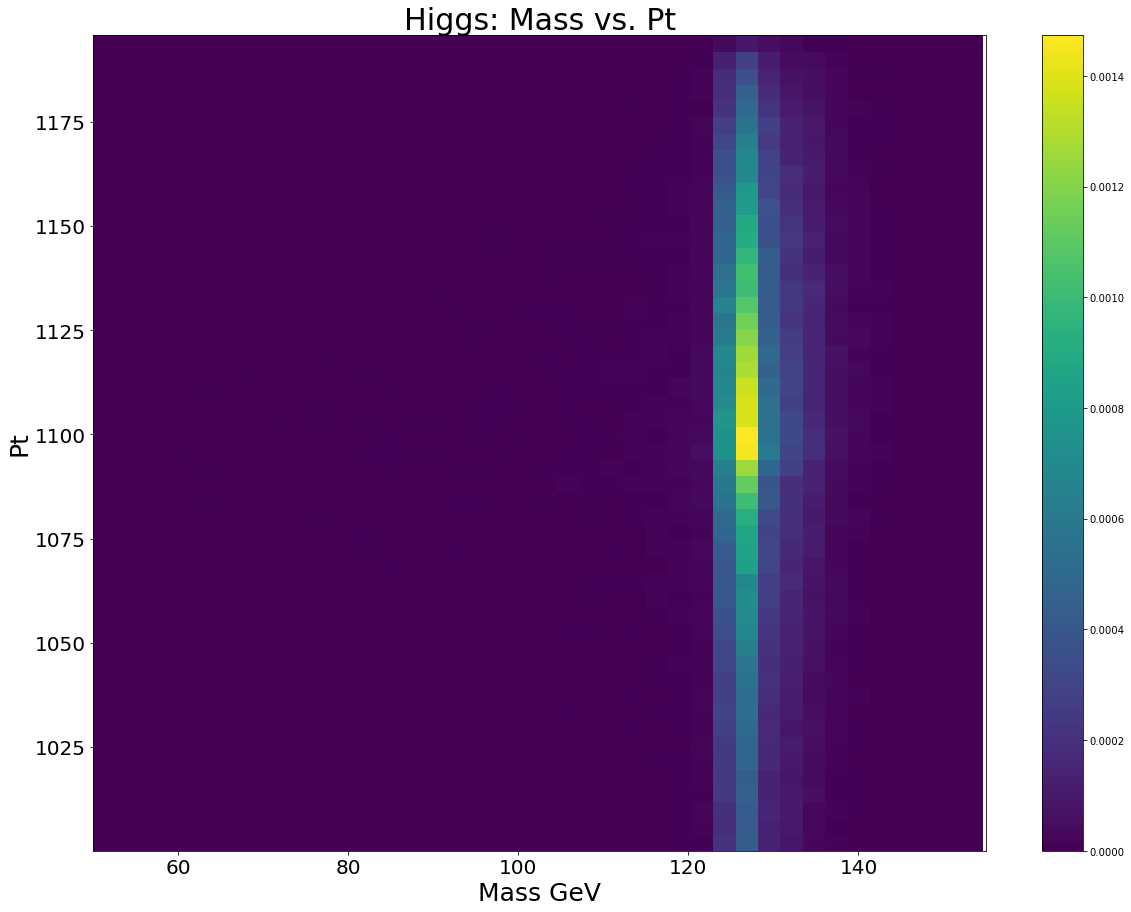

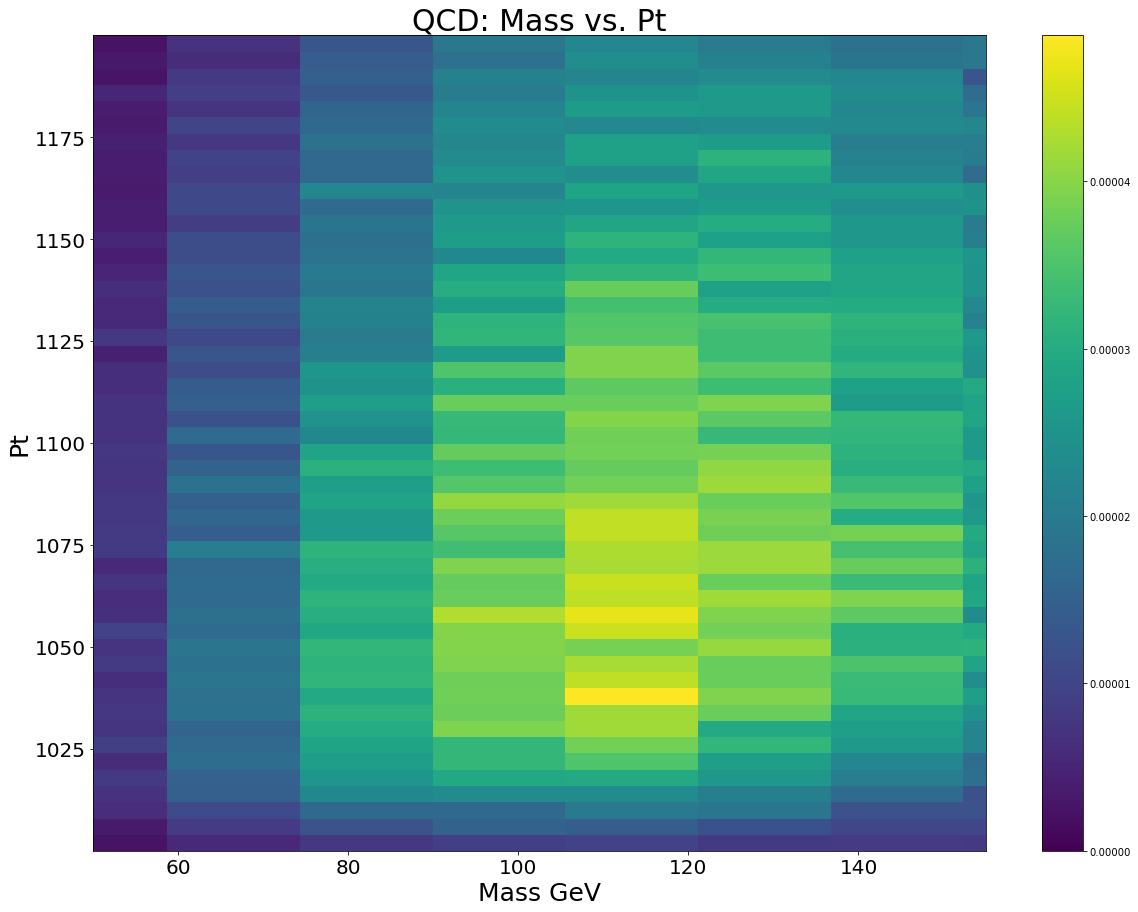

In [61]:
#-----Density Mass and Pt Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(hMass, hPt, bins = 50, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass GeV', size = 25)
ax.set_ylabel('Pt', size = 25)
ax.set_title('Higgs: Mass vs. Pt', size = 30)
plt.colorbar(h[3], ax=ax)
plt.xlim([50, 155])
plt.show()


#-----Density Mass and Pt Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(qMass, qPt, bins = 50, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass GeV', size = 25)
ax.set_ylabel('Pt', size = 25)
ax.set_title('QCD: Mass vs. Pt', size = 30)
plt.colorbar(h[3], ax=ax)
plt.xlim([50, 155])
plt.show()

Above we can see the corelation beteen mass and transverse momentum. 

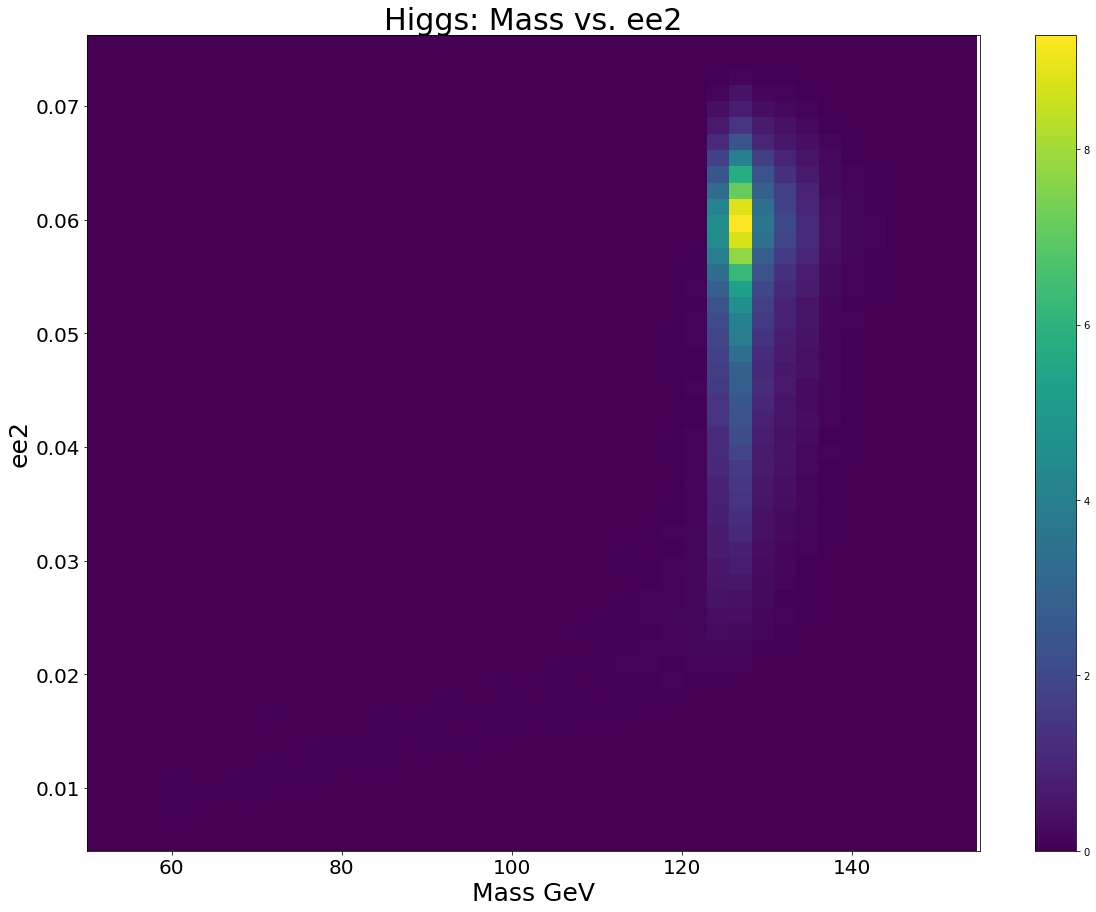

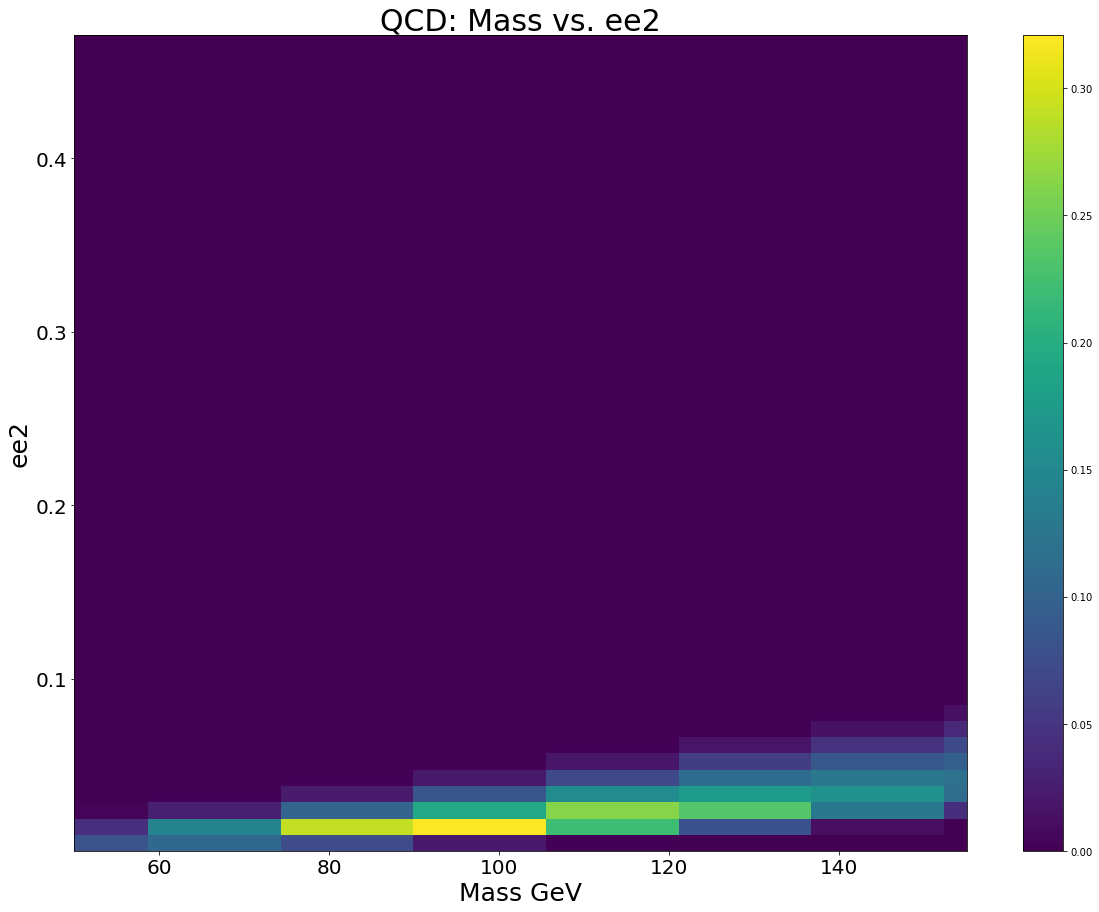

In [62]:
#-----Density Mass and Pt Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(hMass, hEe2, bins = 50, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass GeV', size = 25)
ax.set_ylabel('ee2', size = 25)
ax.set_title('Higgs: Mass vs. ee2', size = 30)
plt.colorbar(h[3], ax=ax)
plt.xlim([50, 155])
plt.show()


#-----Density Mass and Pt Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(qMass, qEe2, bins = 50, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass GeV', size = 25)
ax.set_ylabel('ee2', size = 25)
ax.set_title('QCD: Mass vs. ee2', size = 30)
plt.colorbar(h[3], ax=ax)
plt.xlim([50, 155])
plt.show()

Notice the strong corelation in higgs and ee2.

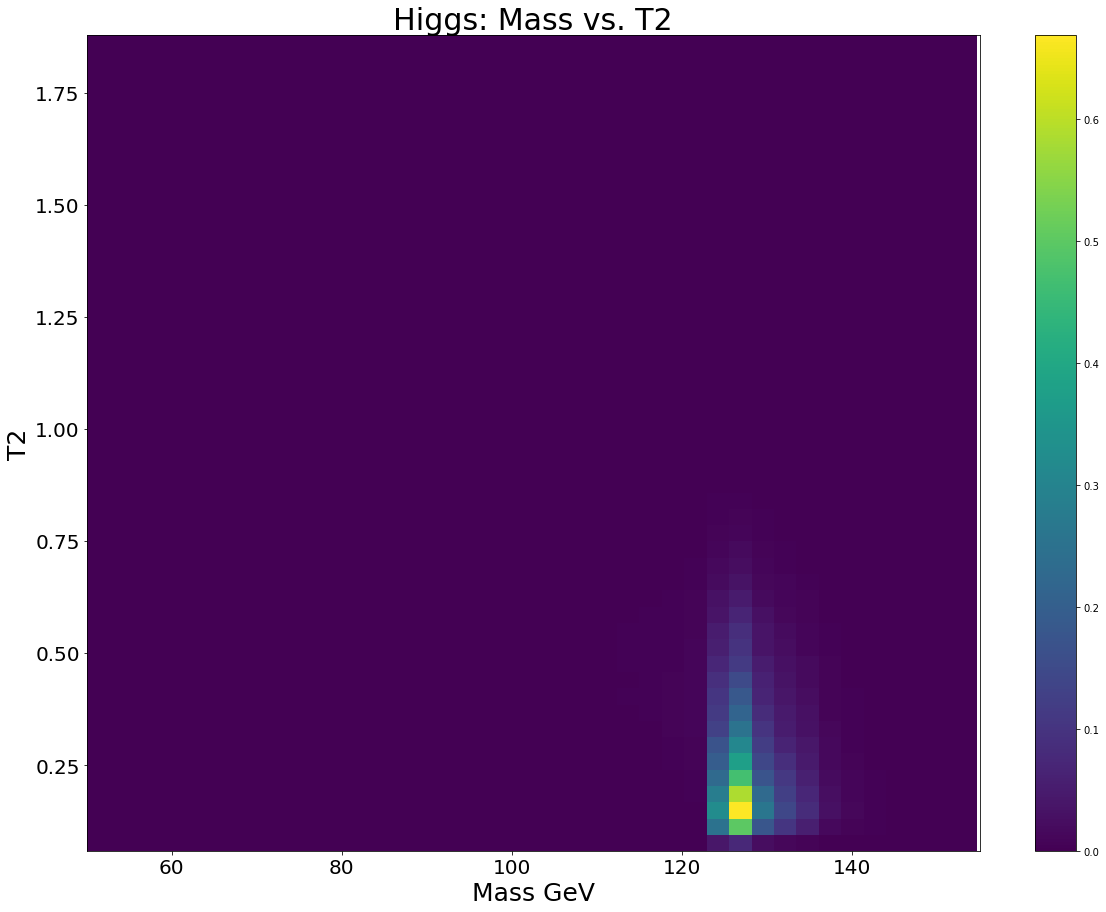

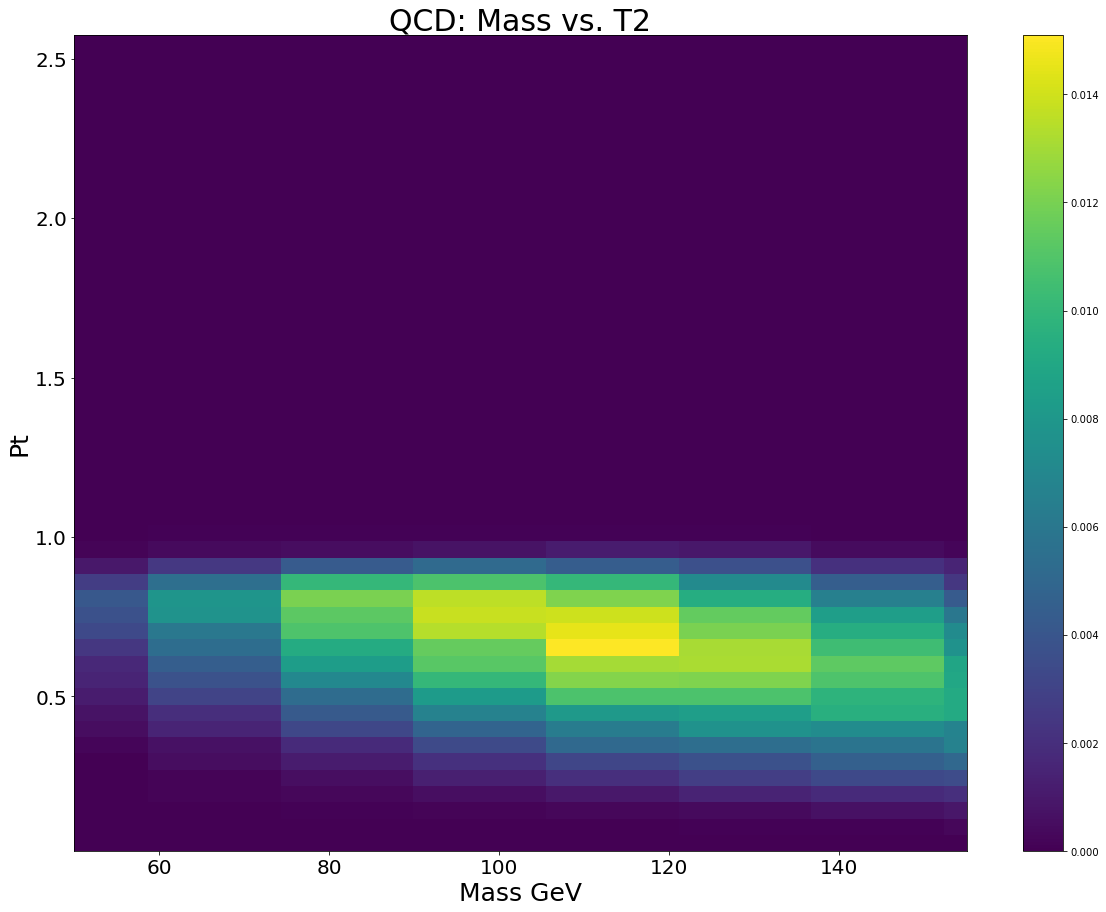

In [64]:
#-----Density Mass and Pt Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(hMass, hT2, bins = 50, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass GeV', size = 25)
ax.set_ylabel('T2', size = 25)
ax.set_title('Higgs: Mass vs. T2', size = 30)
plt.colorbar(h[3], ax=ax)
plt.xlim([50, 155])
plt.show()


#-----Density Mass and Pt Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(qMass, qT2, bins = 50, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass GeV', size = 25)
ax.set_ylabel('Pt', size = 25)
ax.set_title('QCD: Mass vs. T2', size = 30)
plt.colorbar(h[3], ax=ax)
plt.xlim([50, 155])
plt.show()

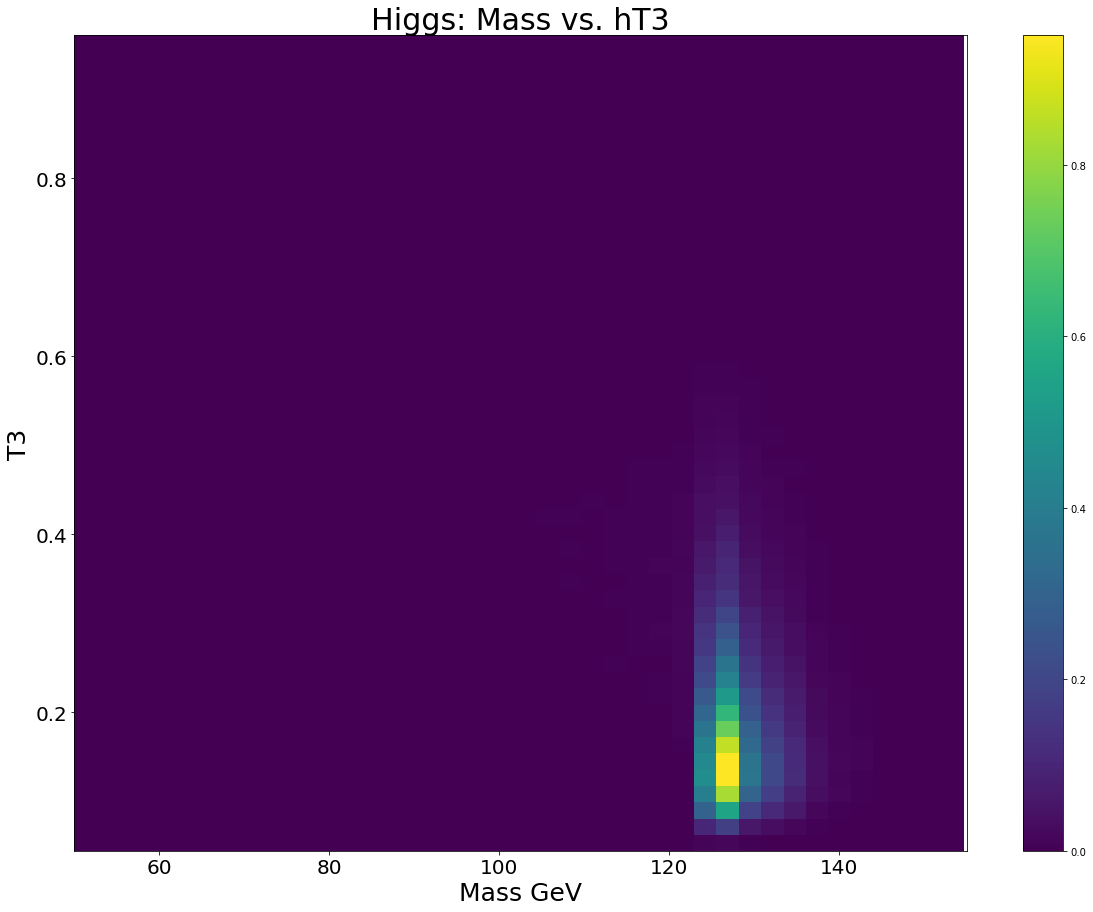

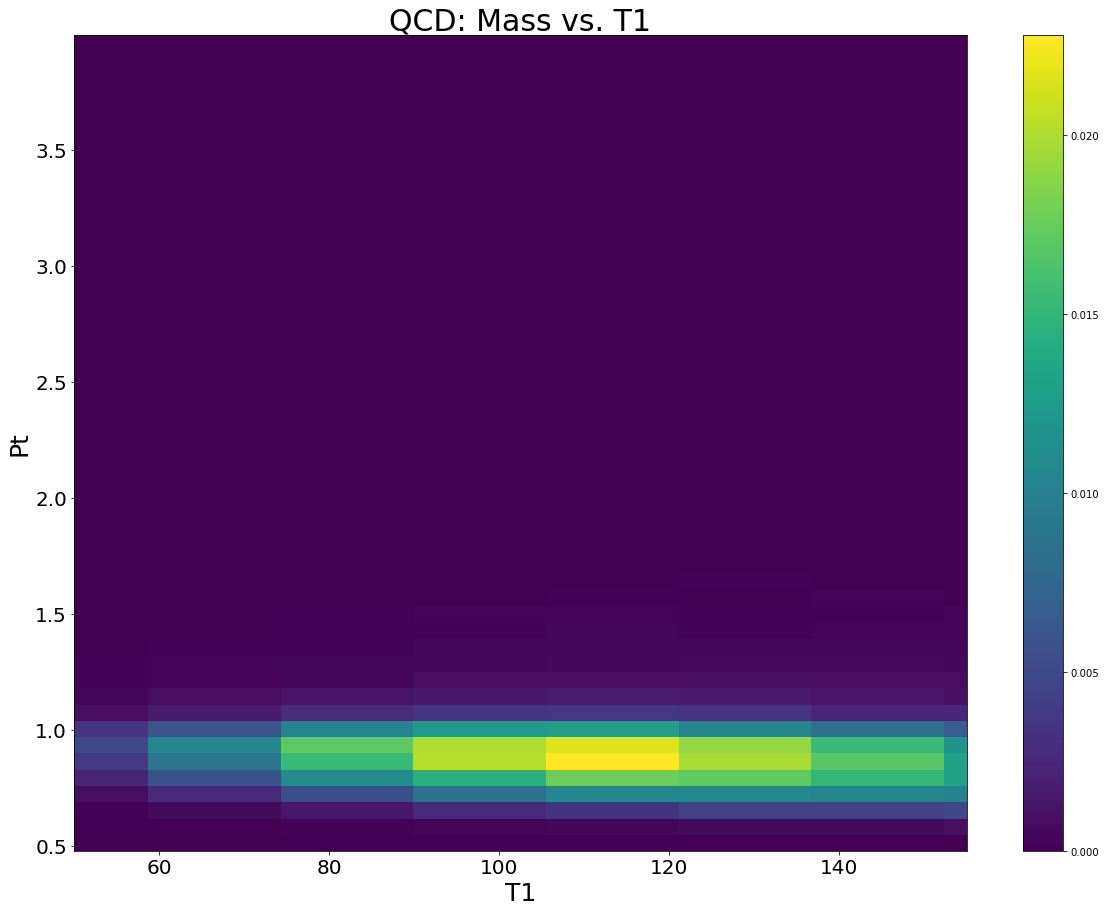

In [70]:
#-----Density Mass and Pt Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(hMass, hT3, bins = 50, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass GeV', size = 25)
ax.set_ylabel('T3', size = 25)
ax.set_title('Higgs: Mass vs. hT3', size = 30)
plt.colorbar(h[3], ax=ax)
plt.xlim([50, 155])
plt.show()


#-----Density Mass and Pt Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(qMass, qT1, bins = 50, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('T1', size = 25)
ax.set_ylabel('Pt', size = 25)
ax.set_title('QCD: Mass vs. T1', size = 30)
plt.colorbar(h[3], ax=ax)
plt.xlim([50, 155])
plt.show()

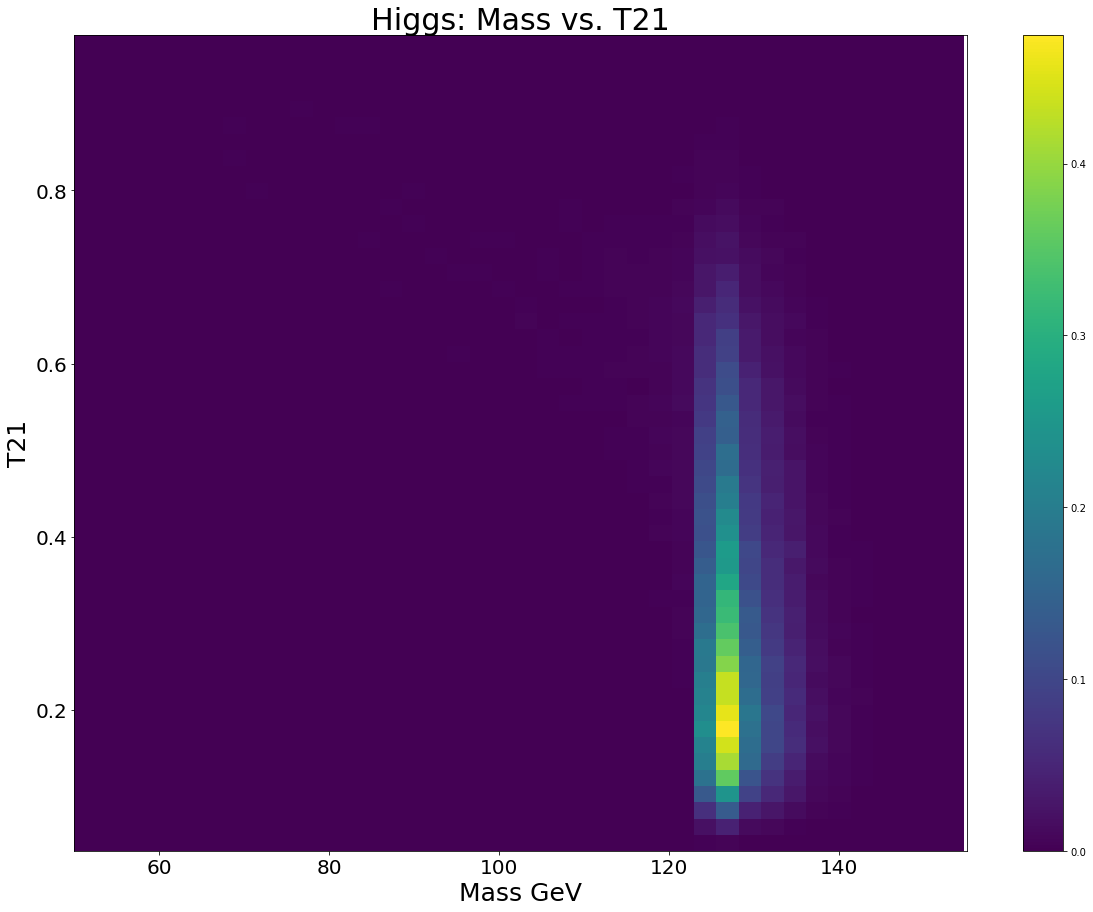

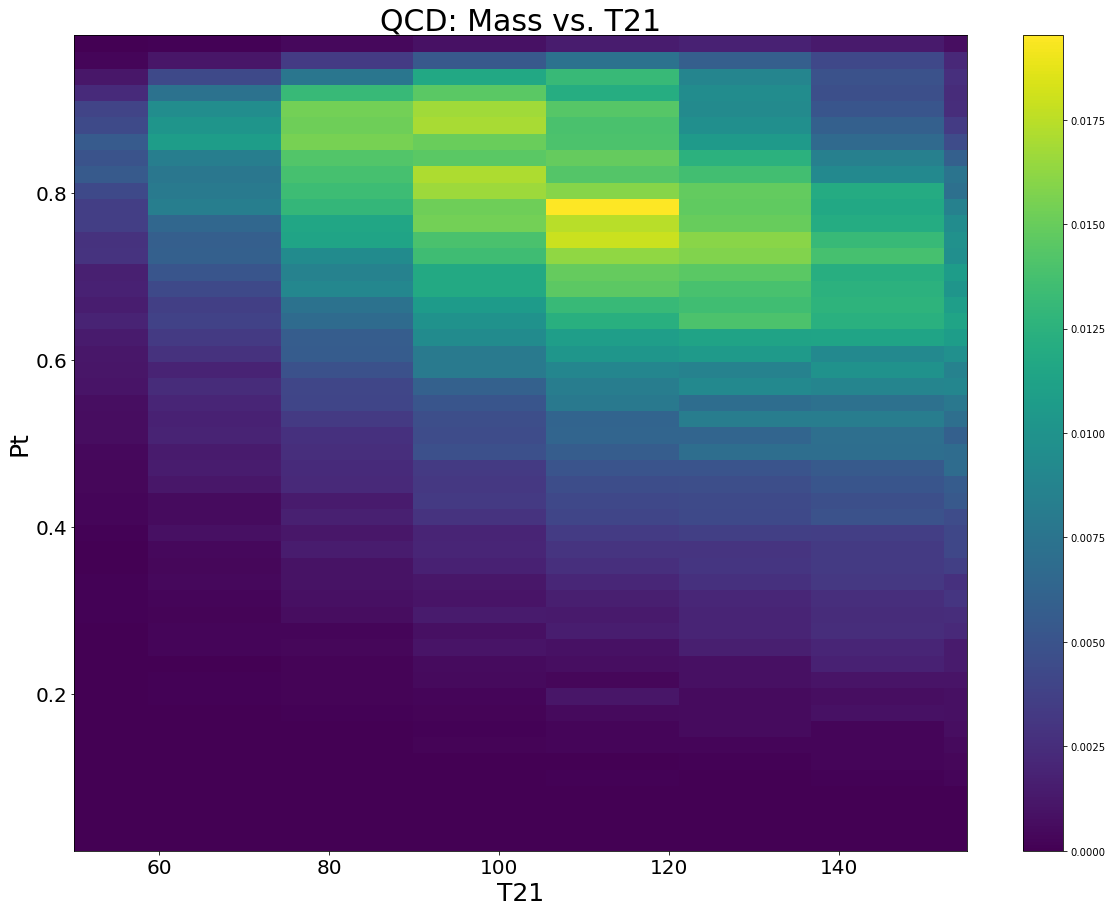

In [71]:
#-----Density Mass and Pt Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(hMass, hT21, bins = 50, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass GeV', size = 25)
ax.set_ylabel('T21', size = 25)
ax.set_title('Higgs: Mass vs. T21', size = 30)
plt.colorbar(h[3], ax=ax)
plt.xlim([50, 155])
plt.show()


#-----Density Mass and Pt Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(qMass, qT21, bins = 50, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('T21', size = 25)
ax.set_ylabel('Pt', size = 25)
ax.set_title('QCD: Mass vs. T21', size = 30)
plt.colorbar(h[3], ax=ax)
plt.xlim([50, 155])
plt.show()

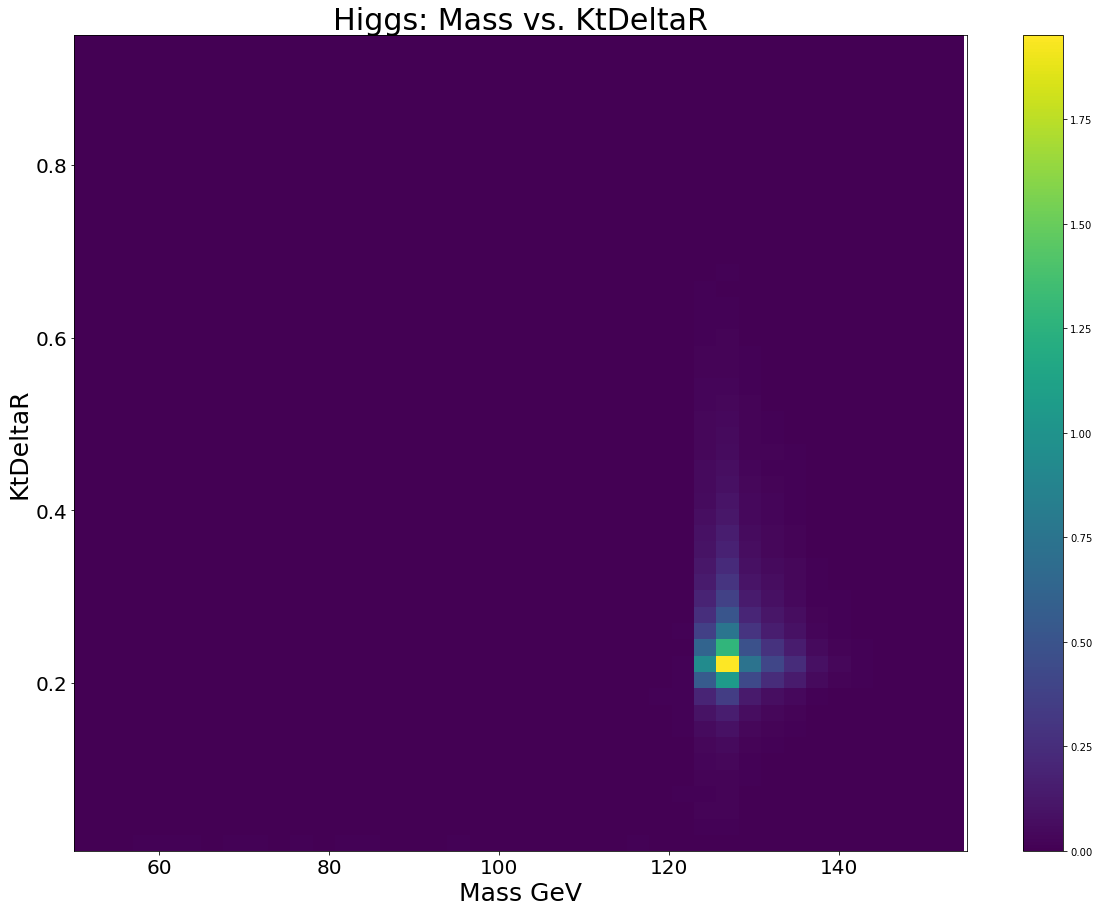

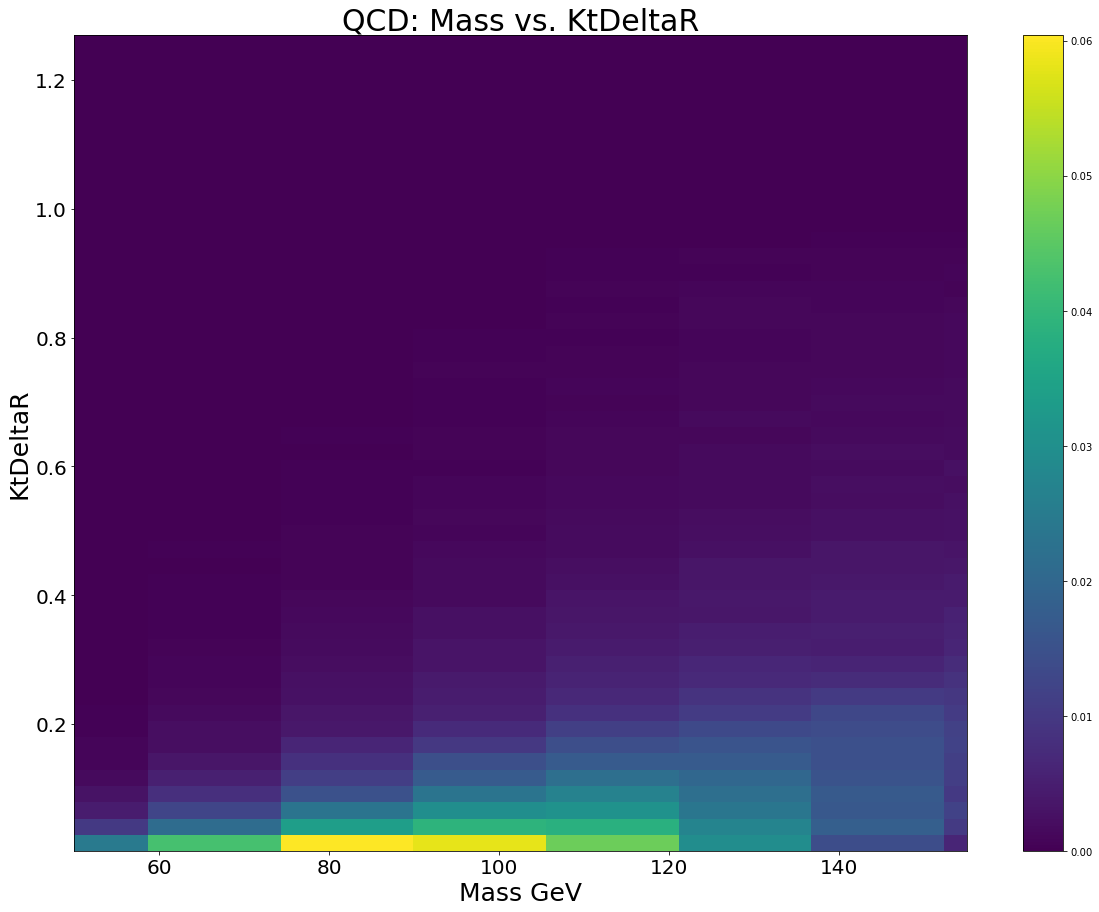

In [67]:
#-----Density mass and KtDeltaR Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(hMass, hKtDeltaR, bins = 50, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass GeV', size = 25)
ax.set_ylabel('KtDeltaR', size = 25)
ax.set_title('Higgs: Mass vs. KtDeltaR', size = 30)
plt.colorbar(h[3], ax=ax)
plt.xlim([50, 155])
plt.show()


#-----Density Mass and Pt Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(qMass, qKtDeltaR, bins = 50, density=True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Mass GeV', size = 25)
ax.set_ylabel('KtDeltaR', size = 25)
ax.set_title('QCD: Mass vs. KtDeltaR', size = 30)
plt.colorbar(h[3], ax=ax)
plt.xlim([50, 155])
plt.show()

In all the 2-D histogram plots above, we can see the strong correlation between mass and the discriminating features in the Higgs Data.

### 2. Are there correlations among these features?

Yes.

One trend to notice is how the Discriminating features and Mass very strongly correlate in the Higgs data, while the QCD data does not have nearly as strong of a correlation and has many more spread out mass values.

It can be seen in the 2-D histograms that applying a mass window around the desired Higgs Mass value can clean our data and allow us to find a higher number of higgs data and drastically cut the amount of QCD background signal.